# Machine Learning - Neural Networks Algorithm for Handwritten Digits Recognition

The purpose of this project is to build neural networks algorithm to recognize the handwritten digits. The data for this project was taken from Prof. Andrew Ng's machine learning class on Coursera, which is a file with M extension.

The data consists of 5000 handwritten digits, each digits is represented by 20 x 20 pixel grayscale image. Let's visualize the data in order to know more about how the handwritten digits looks like. Before that, we need to import necessary libraries first.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

Then, we need to read the data.

In [39]:
handwritingData = loadmat('Data.mat')

xData = handwritingData['X']
yData  =handwritingData['y']

# Since the original data map digits "0" to "10", we need to map it back to "0"
for i in range(len(yData)):
    
    if yData[i] == 10:
        
        yData[i] = 0

## Visualizing the Number

Now we have our feature sets and our response set. Next, we need to define a function to show the image of the number.

In [55]:
def visualizeTheNumber (xData, matrixRow):
    
    for row in range (len(matrixRow)):
        
        matrixData = xData[matrixRow[row],:]
        matrixData = matrixData.reshape(20,20)
        
        plt.subplot(3,5,row+1)
        plt.imshow(matrixData.transpose(), cmap='gray_r')
    

Then, create a variable containing a list of the number of rows in the feature set in which the number we want to visualize. Then, pass it to the function that we have just define.

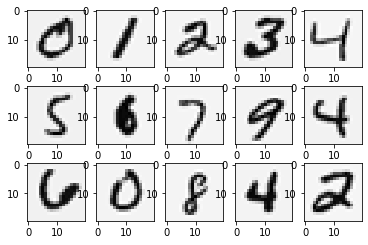

In [54]:
m = [1, 600, 1000, 1620, 2000, 2640, 3102, 3700, 4600, 2344, 3211, 20, 4300, 2222, 1234]
visualizeTheNumber(xData,m)

And there we have it. The visualization of the handwritten digits from 0 to 9. Since we have 10 different kinds of digits, then it means that we will have 10 different classifications as the output. As the input itself, since each of the 20 x 20 pixels digit image is unrolled into 400 rows of 1D vector, then we will have 400 features as the input layer. Meanwhile we will have 25 units for the hidden layer, which brings us to the neural networks schema as follows:

<img src="schema.png" width="700" height="300">

Based on the schema above, now we need to define the variables needed to describe the input layers and hidden layers.

In [42]:
intercept = np.ones((len(xData),1)) #for bias value.
xDataNew = np.column_stack((intercept,xData)) #xData + bias

inputLayerSize = len(xDataNew[0])
hiddenLayerSize = 25
noOfLabels = 10 # numbe rof output
lambdaRegularization = 1 #for regularization parameter.

## Initialize Random Weight

Before we start to delve into neural networks algorithm, first we need to randomly initialize the weight of our parameeters $\theta$. Normally in other algorithm, we can set our initial $\theta$ = 0, but for neural networks, setting our initial $\theta$ to 0 would lead to a non-optimal learning process because we basically give each parameter the same weight. So, it is important to initialize the weight for symmetry breaking. 

So let's create a function to initialize the $\theta$ value to small number.

In [43]:
def initializeWeight(outputVal, inputVal):
    
    epsilon = 0.12 #It can be adjusted according to your need
    thetaWeight = np.zeros((outputVal, inputVal))
    thetaWeight = np.random.rand(outputVal, inputVal) * 2*epsilon-epsilon
    
    return thetaWeight

Then, we define our $\theta$ by calling our function.

In [44]:
Theta1 = initializeWeight(hiddenLayerSize,inputLayerSize) #Theta1 should have the size of num units in hidden layer x num of units in input layer. 
Theta2 = initializeWeight(noOfLabels,hiddenLayerSize+1) # Theta2 should have the size of num units in output layer x num of units in hidden layer.

Theta1[0][0:5]

array([-0.08832092,  0.01912664, -0.04255007,  0.08755889,  0.02458611])

And let's check the shape of our $\theta$ value

In [45]:
np.shape(Theta1), np.shape(Theta2)

((25, 401), (10, 26))

Looks pretty good and as expected so far. Now with this initial $\theta$ value, we can start to define our neural networks algorithm from forward propagation to back propagation.

## Neural Networks Algorithm

### Feedforward Propagation

The first step for neural networks algorithm is the feedforward propagation. Basically the main point of feedforward propagation is to compute the hypothesis $h_\theta(x^{(i)})$. The algorithm for feedforward propagation by looking at the neural networks model is given by:

$$z^{(2)} = \theta^{(1)}*a^{(1)}$$
$$a^{(2)} = g(z^{(2)})$$

and then we add $a_0^{(2)} = 0$ for bias value in the hidden layer.

$$z^{(3)} = \theta^{(2)}*a^{(2)}$$
$$h_\theta(x) = a^{(3)} = g(z^{(3)})$$

where $z^{(2)}$ is basically the matrix multiplication of the feature value $x$ with the transpose of our initial value of $\theta_1$. Meanwhile $a^{(2)}$ is our feature $x$ in the hidden layer after calculating the sigmoid function of $z^{(2)}$. The same applies for $z^{(3)}$ and $a^{(3)}$. In the end our, hypothesis function $h_\theta(x)$ is equal to $a^{(3)}$.

The formula to calculate the sigmoid function is given by:
$$\frac{1}{(1+exp(z))}$$

So first, let's define a function to compute this sigmoid function.


In [46]:
def sigmoidFunction(x):
    
    hypothesisFunct = 1/(1+np.exp(-x))
    
    return hypothesisFunct

We are going to apply the feedforward algorithm together with regularized cost function and back propagation below. So, let's jump to computing the regularized cost function.

### Regularized Cost Function

After obtaining the hypothesis function $h_\theta(x)$ , then we can start to compute the regularized cost function $J$ with the following equation:
$$J(\theta) =
\frac{1}{m}\sum_{i=1}^m
\sum_{k=1}^K 
\left[ -y^{(i)}_k \log((h_{\theta}(x^{(i)})_k)- (1 -y^{(i)}_k) \log(1-(h_{\theta}(x^{(i)}))_k)  \right]
\\ \qquad 
+\frac{\lambda}{2m} \left[\sum_{j=1}^{25} 
\sum_{k=1}^{400} {\left( \theta_{j,k}^{(1)}\right)^2}+
\sum_{j=1}^{10} 
\sum_{k=1}^{25} {\left( \theta_{j,k}^{(2)}\right)^2}\right]$$

where $m$ is the number of training sets, which is 5000 and $K$ is the number of possible outputs, which in our case is 10. Meanwhile, $y$ is the response variable and $\lambda$ is the regularization parameter.

### Back Propagation

Now it is time for us to compute the back propagation algorithm. The main focus of back propagation is to compute the error term $\delta_j^{(l)}$ that measures how much error each input $j$ in layer $l$ contributes for the error of the output. Below is the formula for the back propagation algorithm by looking at the neural networks model.

$$\delta^{(3)} = (h_\theta(x)) - y$$
$$\delta^{(2)} = (\theta^{(2)})^T * \delta^{(3)} . * g'(z^{(2)})$$

where $g'(z^{(2)})$ is the gradient of the sigmoid function and can be computed by the formula:
$$g'(z)=\frac{d}{dz}g(z) = g(z)(1-g(z))$$

Next, let's quickly define a function to compute the gradient of sigmoid function.

In [47]:
def sigmoidGradientFunction(x):
    
    hypothesisFunct = np.multiply((1/(1+np.exp(-x))),(1-(1/(1+np.exp(-x)))))
    
    return hypothesisFunct

Then, we can calculate the capital delta, which is the gradient, as: $$\Delta^{(l)} = \delta^{(l+1)} * (a^{(l)})^T$$

And then sum all of the $\Delta^{(l)}$.

Finally, we can get the partial derivative of our cost function $J$ with respect to $\theta$ with the following formula.

$$\frac{\partial}{\partial \theta}J(\theta) = \frac{1}{m} \Delta + \lambda\theta$$

Now, after writing all of the tedious equations, now we can implement it in the code. Let's define a function to calculate the cost function $J$ and $\frac{\partial}{\partial \theta}J(\theta)$ with feedforward propagation, regularized cost function, and finally back propagation algorithm.

In [48]:
def computeCostFunctionNeuralNetworks(theta1, theta2, x, y, labels, experiments, lambdaReg):
    
    # Convert yData into a matrix -------------------------------------------------------
    
    yMatrix = np.zeros((len(y),labels))
    I = np.identity(labels)
    for i in range (len(y)):
        yMatrix[i,:] = I[y[i],:]
    
    # Forward Propagation Algorithm-------------------------------------------------------
    
    z2 = np.matmul(x,theta1.transpose())
    a2 = sigmoidFunction(z2)
    
    a2Bias = np.ones((len(a2),1))
    a2PlusBias = np.column_stack((a2Bias,a2))
    
    z3 = np.matmul(a2PlusBias,theta2.transpose())
    a3 = sigmoidFunction(z3)
    
    #Compute Unregularized Cost -----------------------------------------------
    
    frontEq = np.multiply(-yMatrix,np.log(a3))
    tailEq = np.multiply(1-yMatrix,np.log(1-a3))
    concatEq = frontEq-tailEq
    
    rowSummation = np.sum(concatEq,axis=1)
    colSummation = np.sum(rowSummation)
    
    J = (1/experiments)*colSummation
    
    # Compute Regularized Cost -------------------------------------------------
    
    # Convert first column to 0 because bias coefficient shouldn't be regularized
    
    theta1[:,0] = 0
    theta2[:,0] = 0
    
    theta1Reg = theta1**2
    theta2Reg = theta2**2
    
    rowSummationTheta1 = np.sum(theta1Reg,axis=1)
    colSummationTheta1 = np.sum(rowSummationTheta1)
    
    rowSummationTheta2 = np.sum(theta2Reg,axis=1)
    colSummationTheta2 = np.sum(rowSummationTheta2)
    
    J = J+((lambdaReg/(2*experiments)))*(colSummationTheta1+colSummationTheta2)
    
    # Backpropagation Algorithm ----------------------------------------------------------
    
    d3 = a3-yMatrix
    theta2WithoutBias = theta2[:,1:]
    a2Derivative = sigmoidGradientFunction(z2)
    d2 = np.multiply(np.matmul(d3,theta2WithoutBias),a2Derivative)
    
    delta1 = np.matmul(d2.transpose(),x)
    delta2 = np.matmul(d3.transpose(),a2PlusBias)
    
    theta1Gradient = (1/experiments)*delta1
    theta2Gradient = (1/experiments)*delta2
    
    scaledTheta1 = (lambdaReg/experiments)*theta1Gradient
    scaledTheta2 = (lambdaReg/experiments)*theta2Gradient
    
    theta1Gradient = theta1Gradient+scaledTheta1
    theta2Gradient = theta2Gradient+scaledTheta2
    
    return J, theta1Gradient, theta2Gradient

Next, if we take a look at the final partial derivative term of $\frac{\partial}{\partial \theta}J(\theta)$, it is an important term in order to obtain an updated value of our initial $\theta$ value with gradient descent optimization. The algorithm to update $\theta$ values with gradient descent optimization is as follows:

$$\theta_j:=\theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

where $\alpha$ is the learning rate that we need to define in advance. By iterating the computation of the cost function using gradient descent optimization and doing the feedforward and back propagation again and again, the $\theta$ values will be updated and the cost function will be minimized.

So, let's create a function to perform gradient descent algorithm.

In [49]:
def gradientDescentNeuralNetworks(x, y, theta1, theta2, alpha, noOfExperiments, iterations, labels, lambdaReg):
    
    JHistory = np.zeros((iterations,1))
    
    for i in range (iterations):
        
        JHistory[i], theta1Grad, theta2Grad = computeCostFunctionNeuralNetworks(theta1, theta2, x, y, labels, noOfExperiments, lambdaReg)
        

        theta1 = theta1 - (alpha*theta1Grad)
        theta2 = theta2 - (alpha*theta2Grad)
        
    return JHistory, theta1, theta2

Next, we also need to define some necessary variables in advance, such as how many iterations we want to run the gradient descent optimization and how big is the learning rate.

In [60]:
alpha = 3
numOfIterations = 2000
noOfTraining = len(yData)

Then, we can run the neural netwroks algorithm now by calling the function we define above and pass all the necessary variables as the input arguments.

In [61]:
J, finTheta1, finTheta2 = gradientDescentNeuralNetworks(xDataNew, yData, Theta1, Theta2, alpha, noOfTraining, numOfIterations, noOfLabels, lambdaRegularization)

In [62]:
J[-1]

array([0.59317059])

Now we can see the final cost function $J$ in the last iterations. Now we need to calculate the percentage of the accuracy of this neural networks model by comparing the result to our response variable $y$. In order to do that, we need to calculate the sigmoid function for our final values of $\theta_1$ and then use the result to compute sigmoid function of $\theta_2$, just like the feedforward propagation. 

The result of this computation is 4000 x 10 matrix, each column represent the probability of each row having particular label of output (digits 0-9). Finally, for each row, we need to return the column in which it has the highest probability value, so at the end we have 4000 rows of 1D vector, just like our response variable $y$. In order to do this, let's define a function.

In [63]:
def predictResultNeuralNetworks(theta1, theta2, x):
    
    probabilityList = np.zeros((len(x),1))
    
    h1 = sigmoidFunction(np.matmul(x,theta1.transpose()))
    h1Bias = np.ones((len(x),1))
    h1PlusBias = np.column_stack((h1Bias,h1))
    h2 = sigmoidFunction(np.matmul(h1PlusBias,theta2.transpose()))
    
    probabilityList = np.argmax(h2, axis=1)
    
    return probabilityList

Then, we call the function that we just define above.

In [64]:
accProbability = predictResultNeuralNetworks(finTheta1, finTheta2, xDataNew)

The final step is to compare our 4000 rows of 1D vector with the response variable $y$ and check, how many rows that they match with each other. After that, we can calculate the final accuracy percentage of the neural networks model.

In [65]:
accNew = np.asarray(accProbability.reshape((len(yData),1)))
    
modelAccuracy = np.mean((accNew == yData))*100
modelAccuracy

97.8

And there we have it! The final percentage of the neural networks algorithm.